In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
df = pd.read_csv("ACLED_export.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752462 entries, 0 to 752461
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   data_id           752462 non-null  int64  
 1   iso               752462 non-null  int64  
 2   event_id_cnty     752462 non-null  object 
 3   event_id_no_cnty  752462 non-null  float64
 4   event_date        752462 non-null  object 
 5   year              752462 non-null  int64  
 6   time_precision    752462 non-null  int64  
 7   event_type        752462 non-null  object 
 8   sub_event_type    752462 non-null  object 
 9   actor1            752462 non-null  object 
 10  assoc_actor_1     328197 non-null  object 
 11  inter1            752462 non-null  int64  
 12  actor2            324188 non-null  object 
 13  assoc_actor_2     91902 non-null   object 
 14  inter2            752462 non-null  int64  
 15  interaction       752462 non-null  int64  
 16  region            75

In [3]:
df['event_date'] = pd.to_datetime(df.event_date)

In [4]:
df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,8898974,368,IRQ36747,36747.0,2022-03-11,2022,1,Explosions/Remote violence,Air/drone strike,Military Forces of Iraq (2020-),...,Mamah,35.5677,44.0168,2,Al Mirbad; Al Sumaria TV,National,"On 11 March 2022, Iraqi F-16 and armed Cessna ...",4,1647270867,IRQ
1,8898984,760,SYR99469,99469.0,2022-03-11,2022,1,Strategic developments,Change to group/activity,Global Coalition Against Daesh,...,Al-Hasakeh,36.5054,40.7429,3,Facebook; SOHR,Other-New media,"Movement of forces: On 11 March 2022, a Global...",0,1647270867,SYR
2,8898990,760,SYR99481,99481.0,2022-03-11,2022,1,Strategic developments,Change to group/activity,Global Coalition Against Daesh,...,Rmelan,37.0072,41.9521,2,Facebook; SHAAM,New media-National,"Movement of forces: On 11 March 2022, a US mil...",0,1647270867,SYR
3,8899004,760,SYR99535,99535.0,2022-03-11,2022,1,Battles,Armed clash,Unidentified Armed Group (Syria),...,Ar-Raqqa,35.9428,39.0519,2,Facebook; SHAAM,New media-National,"On 11 March 2022, an unknown armed group attac...",1,1647270867,SYR
4,8899034,368,IRQ36702,36702.0,2022-03-11,2022,1,Protests,Peaceful protest,Protesters (Iraq),...,As Samawah,31.3059,45.2799,3,Al Mirbad,National,"On 11 March 2022, unknown tribal protesters co...",0,1647270867,IRQ


In [5]:
df = df.loc[(df['event_date'] >= '2022-02-27') & (df['event_date'] <= '2022-03-10')]

In [6]:
df = df.loc[df['country'].isin(['Ukraine', 'Russia'])]

<AxesSubplot:title={'center':'Number of events by day'}, xlabel='event_date'>

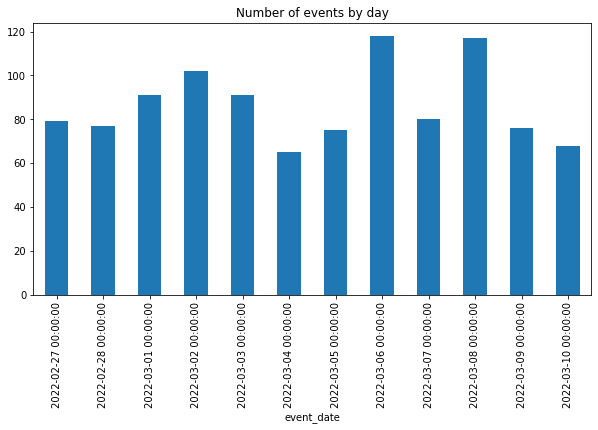

In [7]:
df.groupby('event_date').event_id_cnty.nunique().plot(title='Number of events by day',kind='bar')

<AxesSubplot:title={'center':'Number of events by day and type'}, xlabel='event_date'>

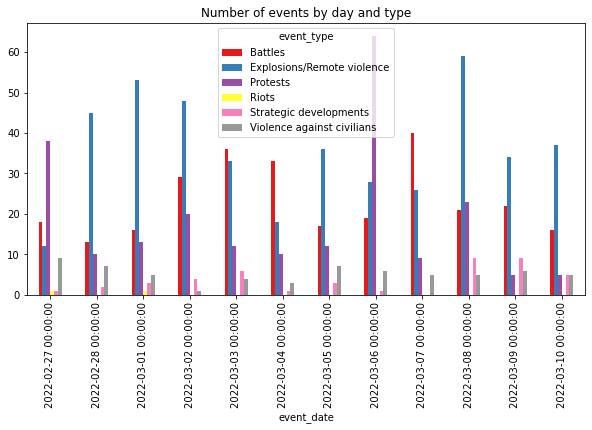

In [8]:
df_events = df.groupby('event_date').event_type.value_counts().to_frame('occurences').reset_index()
df_events = df_events.pivot_table(values='occurences',index='event_date', columns='event_type').reset_index()
df_events.index.name = None
df_events.fillna(0, inplace=True)
df_events.plot(x='event_date',kind='bar', title='Number of events by day and type', cmap='Set1')

In [9]:
sentiment_df = pd.read_csv('Tweets - Sentiment Analysis (RoBERTa).csv', lineterminator='\n')
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735462 entries, 0 to 3735461
Data columns (total 12 columns):
 #   Column    Dtype  
---  ------    -----  
 0   tweetid   int64  
 1   text      object 
 2   hashtags  object 
 3   language  object 
 4   date      object 
 5   negative  float64
 6   neutral   float64
 7   positive  float64
 8   anger     float64
 9   joy       float64
 10  optimism  float64
 11  sadness   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 342.0+ MB


In [10]:
sentiment_df["date"] = sentiment_df["date"] + "2022"
sentiment_df["date"] = pd.to_datetime(sentiment_df.date, format="%b%d%Y")

In [11]:
sentiment_df.drop(columns='tweetid', inplace=True)
sentiment_df = sentiment_df.groupby("date").mean().reset_index()

<AxesSubplot:title={'center':'Sentiment by day'}, xlabel='date'>

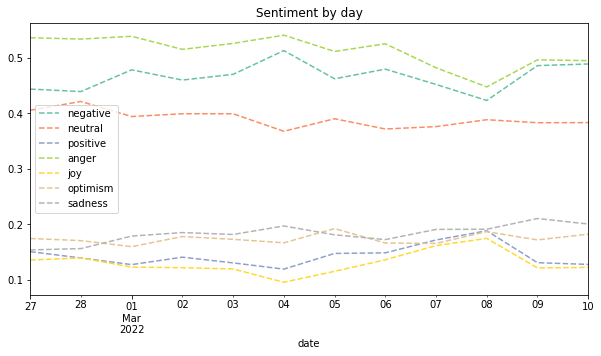

In [12]:
sentiment_df.plot(x='date', linestyle='dashed', title='Sentiment by day', cmap='Set2')

In [13]:
merged_df = pd.merge(df_events, sentiment_df, how='inner', left_on='event_date', right_on='date')
merged_df.drop(columns='event_date', inplace=True)

In [14]:
merged_df

,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians,date,negative,neutral,positive,anger,joy,optimism,sadness
0,18.0,12.0,38.0,1.0,1.0,9.0,2022-02-27,0.443752,0.405573,0.150675,0.536336,0.135499,0.174419,0.153746
1,13.0,45.0,10.0,0.0,2.0,7.0,2022-02-28,0.439319,0.421409,0.139272,0.533962,0.139348,0.170520,0.156170
2,16.0,53.0,13.0,1.0,3.0,5.0,2022-03-01,0.478469,0.394266,0.127265,0.538898,0.122757,0.159623,0.178722
3,29.0,48.0,20.0,0.0,4.0,1.0,2022-03-02,0.460052,0.399270,0.140677,0.515387,0.121702,0.177871,0.185040
4,36.0,33.0,12.0,0.0,6.0,4.0,2022-03-03,0.470333,0.399250,0.130417,0.526077,0.119452,0.172837,0.181634
5,33.0,18.0,10.0,0.0,1.0,3.0,2022-03-04,0.513187,0.367686,0.119127,0.541005,0.095475,0.166575,0.196945
6,17.0,36.0,12.0,0.0,3.0,7.0,2022-03-05,0.462307,0.390269,0.147424,0.511617,0.115166,0.192200,0.181017
7,19.0,28.0,64.0,0.0,1.0,6.0,2022-03-06,0.479728,0.371810,0.148462,0.525449,0.135963,0.166256,0.172332
8,40.0,26.0,9.0,0.0,0.0,5.0,2022-03-07,0.452198,0.376117,0.171685,0.482216,0.161560,0.165447,0.190776
9,21.0,59.0,23.0,0.0,9.0,5.0,2022-03-08,0.423213,0.388523,0.188264,0.447725,0.174570,0.186687,0.191017


In [15]:
event_cols = ['Battles', 'Explosions/Remote violence', 'Protests','Riots', 'Strategic developments', 'Violence against civilians']
sentiment_cols = ['negative', 'neutral', 'positive', 'anger', 'joy', 'optimism','sadness']

/tmp/ipykernel_16791/3083135227.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


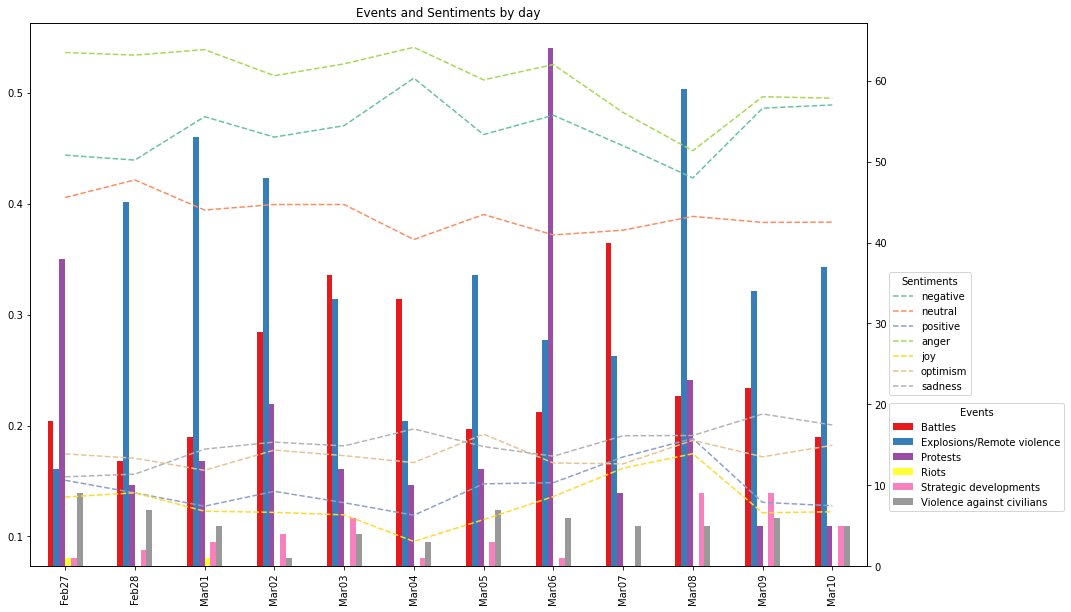

In [48]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()
merged_df[event_cols].plot(kind='bar', ax=ax1, cmap='Set1')
merged_df[sentiment_cols].plot(kind='line', linestyle='dashed', ax=ax2, cmap='Set2')
ax1.legend(title='Events', loc='center left', bbox_to_anchor=(1.02, 0.2))
ax2.legend(title='Sentiments', loc='upper left', bbox_to_anchor=(1.02, 0.55))
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()
ax1.set_title("Events and Sentiments by day")
ax1.set_xticklabels(merged_df.date.dt.strftime('%b%d').unique())

fig.show()

<AxesSubplot:>

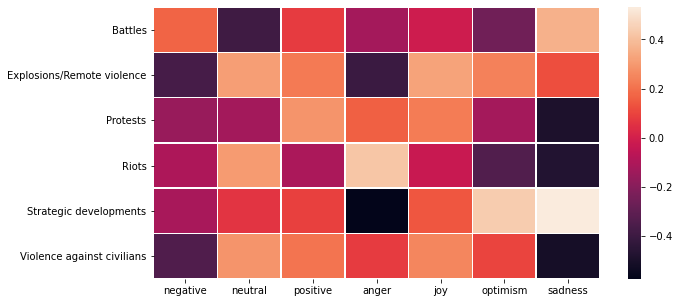

In [30]:
corr = merged_df.corr()
corr = corr.loc[event_cols, sentiment_cols]

sns.heatmap(corr, xticklabels=sentiment_cols, yticklabels=event_cols, linewidths=.5)